# Notebook de Exemplos: Funções de Aproximação Polinomiais.

Este notebook demonstra o uso de três funções de aproximação:

1.  `regressao_linear`: Ajusta uma reta a um conjunto de pontos de dados.
2.  `regressao_logaritmica`: Ajusta uma curva logarítmica a um conjunto de pontos.
3.  `polinomio_de_taylor`: Encontra a aproximação de Taylor para uma função simbólica em torno de um ponto.

# Código

In [6]:
# Python 3

# Bibliotecas padrão.
import math

# Bibliotecas de terceiros.
import numpy as np
import numpy.typing as npt
import sympy as sp
import matplotlib.pyplot as plt

## Funções polinomiais de aproximação.

# Regressão Linear.
# ----------------------------------------------------------------------
def regressao_linear(x: npt.ArrayLike, y: npt.ArrayLike, plot: bool = False) -> tuple[float, float]:
    """
    Calcula o coeficiente angular 'a' e o coeficiente linear 'b' de uma regressão linear simples (y = ax + b).

    A regressão é realizada utilizando o Método dos Mínimos Quadrados Ordinários (MQO).

    Parâmetros:
    ----------
    x : Vetor contendo os valores da variável independente.
    y : Vetor contendo os valores da variável dependente.

    Retorna:
    -------
    tuple
        Uma tupla contendo (a, b), onde:
        a (float): Coeficiente angular da linha de regressão.
        b (float): Coeficiente linear da linha de regressão.

    Levanta:
    -------
    ValueError: Se 'x' e 'y' tiverem comprimentos diferentes ou se tiverem menos de 2 pontos de dados, o que é insuficiente para a regressão.

    Dependências:
    ------------
    - É necessário ter a biblioteca `numpy` (importada como `np`).
    """
    # Converte as entradas para arrays numpy para garantir que o resto do código opere de forma consistente.
    x = np.asarray(x)
    y = np.asarray(y)

  # Verificando se os dados podem satisfazer as equações da regressão linear.
    if len(x) != len(y):
        raise ValueError("X e y devem ter o mesmo número de amostras.")
    if len(x) < 2:
        raise ValueError("A regressão requer pelo menos 2 pontos.")

    # Calcula a média de x e de y.
    x_media = np.mean(x)
    y_media = np.mean(y)

    numerador = np.sum((x - x_media) * (y - y_media))
    denominador = np.sum((x - x_media)**2)

    if np.isclose(denominador, 0):
        raise ValueError("Valores de 'x' são constantes. A regressão linear não pode ser calculada.")

    a = numerador / denominador
    b = y_media - (a * x_media)

    if plot:
        print(f"Coeficientes encontrados:")
        print(f"Inclinação (a): {a:.4f}")
        print(f"Intercepto (b): {b:.4f}")

        # Cria 100 pontos uniformemente espaçados entre o menor e o maior ponto de x1, para criar a reta do primeiro ponto ao fim.
        x2 = np.linspace(min(x), max(x), 100)

        # Equação da reta de regressão.
        y2 = (a * x2) + b

        # Plot dos dados e da reta.
        plt.scatter(x, y, color='red', label='Dados Originais')
        plt.plot(x2, y2, color='blue', linewidth=2, label=f'Reta de Regressão: y = {a:.2f}x + {b:.2f}')

        # Calcula a margem de x e de y.
        x_margin = (max(x) - min(x)) * 0.1
        y_margin = (max(y) - min(y)) * 0.1

        # Limita a margem de x e de y.
        plt.xlim(min(x) - x_margin, max(x) + x_margin)
        plt.ylim(min(y) - y_margin, max(y) + y_margin)

        # Legendas e grade.
        plt.title("Regressão Linear")
        plt.xlabel("Eixo X")
        plt.ylabel("Eixo Y")
        plt.legend()
        plt.grid(True) # Grade quadriculada.

        # Plot.
        plt.show()

    return a, b

# Regressão logarítimica.
# ----------------------------------------------------------------------
def regressao_logaritmica(x: npt.ArrayLike, y: npt.ArrayLike, plot: bool = False) -> tuple[float, float]:
    """
    Calcula os coeficientes 'a' e 'b' de uma regressão logarítmica do tipo (y = a * ln(x) + b), e
    optacionalmente, plota a função de regressão.

    Este método funciona transformando a variável preditora 'x', aplicando o logaritmo natural (ln),
    depois utilizando a função 'regressao_linear' padrão nos dados transformados -> (ln(x), y).

    Parâmetros:
    ----------
    x: Vetor contendo os valores da variável independente.
    IMPORTANTE: Todos os valores de 'x' devem ser estritamente positivos (x > 0), pois o logarítmo de valores negativos não é definido.

    y: Vetor contendo os valores da variável dependente.

    plot (bool, opcional): Se True, gera um gráfico comparando a função original e o polinômio de Taylor. Por padrão é False.

    Retorna:
    -------
    tuple
        Uma tupla contendo (a, b), onde:
        a (float): Coeficiente 'a' que multiplica o termo ln(x).
        b (float): Coeficiente 'b' (intercepto) da linha de regressão.

    Plot (Opcional): Plot dos pontos e da função aproximadora.

    Levanta:
    -------
    ValueError
        Herdado da função 'regressao_linear':
        - Se 'x' e 'y' tiverem comprimentos diferentes.
        - Se tiverem menos de 2 pontos de dados.
    RuntimeWarning
        Pode ser levantado pelo `numpy` se 'x' contiver valores
        menores ou iguais a zero, resultando em 'NaN' ou '-inf'.
    """
    # Converte as entradas para arrays numpy para garantir que o resto do código opere de forma consistente.
    x = np.asarray(x)
    y = np.asarray(y)

    # Verifica se algum x é negativo, pois log(negativo) é indefinido e dará erro.
    if np.any(x <= 0):
        raise ValueError("Todos os valores de 'x' devem ser positivos para a regressão logarítmica.")

    # Transforma a variável x aplicando o logaritmo natural
    log_x = np.log(x)

    # Usa a função de regressão linear já existente nos dados transformados.
    a, b = regressao_linear(log_x, y)

    if plot:
        print(f"Coeficientes encontrados:")
        print(f"a: {a:.4f}")
        print(f"b: {b:.4f}")

        # Cria 100 pontos uniformemente espaçados entre o menor e o maior ponto de x1, para criar a função do primeiro ponto ao fim.
        x2 = np.linspace(min(x), max(x), 100)

        # Equação da função de regressão.
        y2 = (a * np.log(x2)) + b

        # Plot dos dados e da função.
        plt.scatter(x, y, color='red', label='Dados Originais')
        plt.plot(x2, y2, color='blue', linewidth=2, label=f'Função de Regressão: y = {a:.2f}*ln(x) + {b:.2f}')

        # Calcula a margem de x e de y.
        x_margin = (max(x) - min(x)) * 0.1
        y_margin = (max(y) - min(y)) * 0.1

        # Limita a margem de x e de y.
        plt.xlim(min(x) - x_margin, max(x) + x_margin)
        plt.ylim(min(y) - y_margin, max(y) + y_margin)

        # Legendas e grade.
        plt.title("Regressão Logarítmica")
        plt.xlabel("Eixo X")
        plt.ylabel("Eixo Y")
        plt.legend()
        plt.grid(True) # Grade quadriculada.

        # Plot.
        plt.show()

    return a, b

# Polinômio de Taylor.
# ----------------------------------------------------------------------
def polinomio_de_taylor(function: sp.Expr, x_symbol: sp.Symbol, point: float, times: int, plot: bool = False)-> sp.Expr:
    """
    Calcula, imprime e opcionalmente plota o Polinômio de Taylor
    para uma dada função em torno de um ponto.

    Esta função utiliza a biblioteca SymPy para realizar a
    diferenciação simbólica e a construção do polinômio.

    Se plot = True, utiliza Numpy e Matplotlib para visualizar a aproximação.

    Parâmetros:
    ----------
    function (sp.Expr): A expressão simbólica da função que será aproximada.

    x_symbol (sp.Symbol): O símbolO em relação ao qual o polinômio será construído e as derivadas calculadas.

    point (float): O ponto de expansão 'a' (o centro) em torno do qual a função será aproximada. IMPORTANTE: Ponto será do eixo x.

    times (int): O número de termos a serem usados na série. O polinômio resultante terá grau 'times - 1'.

    plot (bool, opcional): Se True, gera um gráfico comparando a função original e o polinômio de Taylor. Por padrão é False.

    Retorna:
    -------
    sympy.Expr: A expressão simbólica do Polinômio de Taylor resultante.

    Plot (Opcional): Plot da função e da aproximação de Taylor.

    Dependências:
    ------------
    - É necessário ter as bibliotecas `sympy` (importada como `sp`)
      e `math` importadas no escopo.
      `numpy` (importado como `np`) - Necessário se plot=True.
      `matplotlib.pyplot` (importado como `plt`) - Necessário se plot=True.
    """

    # Inicia o polinômio, iremos adicionar os termos aqui depois.
    f_poly = 0

    # Operação equivalente ao somatório do polinômio de Taylor.
    for i in range(times):

            # Calcula a i-ésima derivada simbólica (f"'(x)).
            derivada_i_simbolica = sp.diff(function, x_symbol, i)

            # Avalia a derivada no ponto 'a'.
            derivada_no_ponto = derivada_i_simbolica.subs(x_symbol, point)

            # Calcula o fatorial.
            fatorial = math.factorial(i)

            # Monta o i-ésimo termo do polinômio.
            termo_polinomio = (derivada_no_ponto * (x_symbol - point)**i) / fatorial

            # Adiciona ao polinômio total.
            f_poly += termo_polinomio

    print(f"O polinômio de Taylor com {times} termos é:")
    print(f_poly)

    if plot:
        print("\nGerando gráfico de comparação.")

        # Convertendo expressões simbólicas em funções numéricas.
        # 'numpy' é usado para permitir que as funções lidem com arrays do numpy.
        f_original_num = sp.lambdify(x_symbol, function, 'numpy')
        f_poly_num = sp.lambdify(x_symbol, f_poly, 'numpy')

        # Definindo o intervalo de plotagem.
        # O np.linspace cria um array de pontos uniformemente espaçados.
        x_vals = np.linspace(point - 2.5, point + 2.5, 400)

        # Calcula os valores 'y' para os "pontos reais" (função original).
        y_original = f_original_num(x_vals)

        # Calcula os valores 'y' para a "função ajustada" (polinômio).
        y_poly = f_poly_num(x_vals)

        # Cria o gráfico.
        plt.figure(figsize=(10, 6))

        # Plota a função original.
        plt.plot(x_vals, y_original, color='red', label=f"Função Original: ${sp.latex(function)}$",
                linewidth=2, linestyle='--')

        # Plota o polinômio.
        plt.plot(x_vals, y_poly, color='blue', label=f"Polinômio de (Grau {times-1}): ${sp.latex(f_poly)}$",
                    linewidth=2, alpha=0.8)

        # Marca o ponto de expansão 'point'.
        y_point = f_original_num(point)
        plt.plot(point, y_point, 'ro', label=f'Ponto de Expansão ($a={point}$)')

        # Configurações gerais do gráfico.
        plt.title(f"Aproximação de Taylor (Grau {times-1}) em torno de $x={point}$")
        plt.xlabel(str(x_symbol))
        plt.ylabel('$f(x)$')
        plt.legend(fontsize='small')
        plt.grid(True)
        plt.axvline(x=point, color='gray', linestyle=':', linewidth=1)
        plt.axhline(y=y_point, color='gray', linestyle=':', linewidth=1)

        # Define limites de 'y'.
        y_range = np.nanmax(y_original) - np.nanmin(y_original)
        if y_range < 1: y_range = 10 # Evita o zoom extremo.
        plt.ylim(np.nanmin(y_original) - y_range * 0.5, np.nanmax(y_original) + y_range * 0.5)

        # Plot.
        plt.show()

    return f_poly
# ---------------------------------------------------------------------

# Testes de regressão linear.

Coeficientes encontrados:
Inclinação (a): 2.7998
Intercepto (b): 8.6170


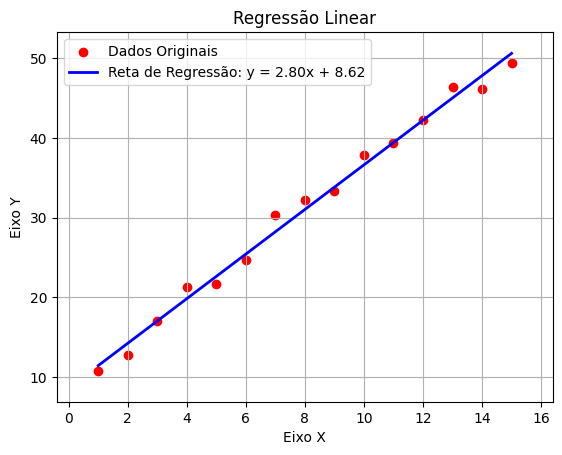

In [8]:
# Teste 1:
# Simulação de um conjunto de dados que segue a reta 'y = 3x + 7' com um pequeno ruído.

np.random.seed(42) # Para resultados reprodutíveis
x_linear = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15])
y_linear = 3 * x_linear + 7 + np.random.randn(15) * 1.5 # y = 3x + 7 + ruído

# Executando a função com plot
a, b = regressao_linear(x_linear, y_linear, plot=True)

In [20]:
# Teste 2:
# Rodando o código com números iguais em 'x'.
# Esperado: erro, pois na regressão linear se tivermos números iguais em x, o denominador é zero e divisão por zero e indefinida.

x_constante = [5, 5, 5, 5, 5]
y_constante = [1, 2, 3, 4, 5]

try:
    regressao_linear(x_constante, y_constante)
except ValueError as e:
    print(f"Erro capturado: {e}")

Erro capturado: Valores de 'x' são constantes. A regressão linear não pode ser calculada.


# Testes de regressão logarítmica.

Coeficientes encontrados:
a: 3.6922
b: 2.2756


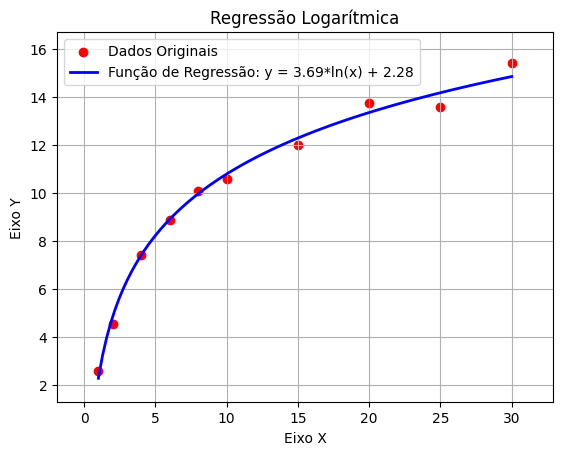

In [34]:
# Teste 1:
# Simulação de um conjunto de dados que segue a função 'y = 4*ln(x) + 1.5' com um pequeno ruído.

np.random.seed(101)
x_log = np.array([1, 2, 4, 6, 8, 10, 15, 20, 25, 30])
y_log = 4 * np.log(x_log) + 1.5 + np.random.randn(10) * 0.4 # y = 4*ln(x) + 1.5 + ruído

# Executando a função com plot
a_log, b_log = regressao_logaritmica(x_log, y_log, plot=True)

In [26]:
# Teste 2:
# Rodando o código com um número zero ou negativo em x.
# Esperado: erro, pois ln(0) ou ln(negativo) é indefinido pela matemática.

x_zero = np.array([0, -1, 2, 3])
y_zero = np.array([1, 2, 3, 4])

try:
    regressao_logaritmica(x_zero, y_zero)
except ValueError as e:
    print(f"Erro capturado: {e}")

Erro capturado: Todos os valores de 'x' devem ser positivos para a regressão logarítmica.


# Testes de polinômio de Taylor.

In [30]:
# Definindo o símbolo para o sympy.
x = sp.Symbol('x')

O polinômio de Taylor com 6 termos é:
x**5/120 - x**3/6 + x

Gerando gráfico de comparação.


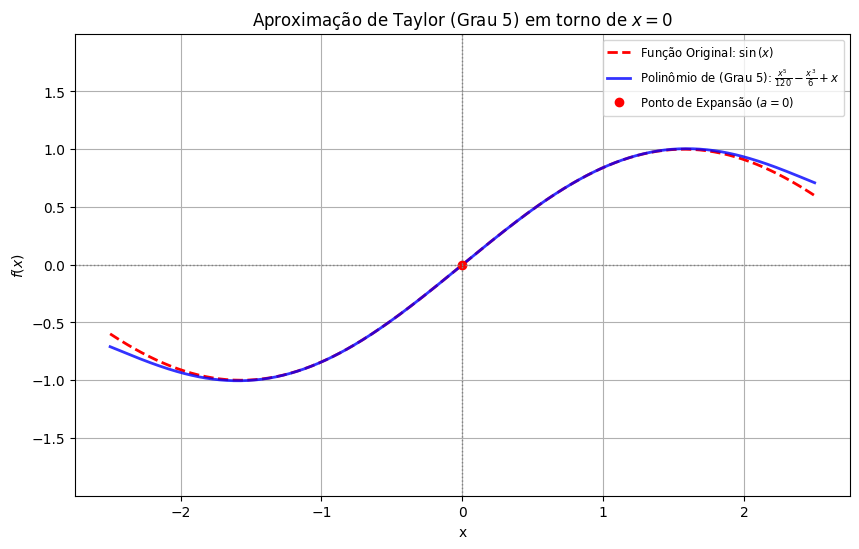

In [27]:
# Teste 1:
# Polinômio de Taylor de grau 5 (times - 1) da função sin(x) no ponto 0.

funcao_seno = sp.sin(x)
p_seno = polinomio_de_taylor(funcao_seno, x, point=0, times=6, plot=True)

O polinômio de Taylor com 4 termos é:
-x - (x - 1)**3 + (x - 1)**2 + 2

Gerando gráfico de comparação.


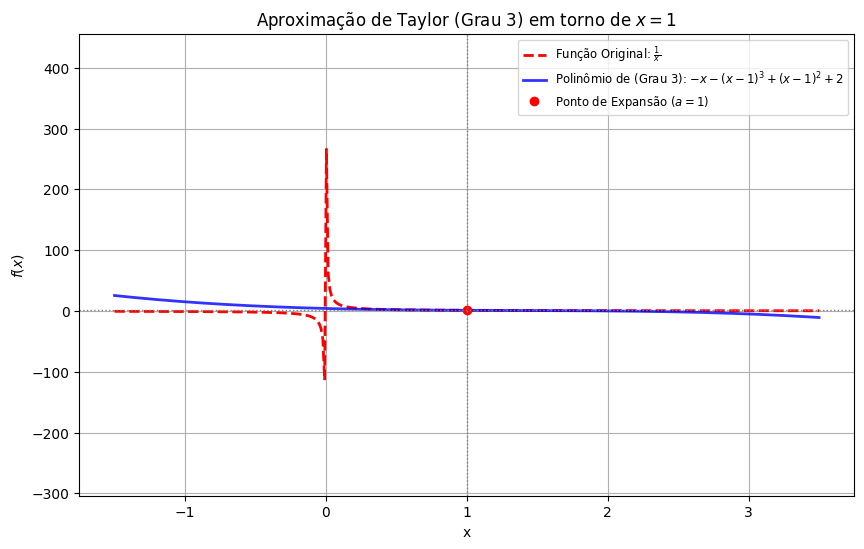

In [28]:
# Teste 2:
# Polinômio de Taylor de grau 3 (times - 1) da função 1/x no ponto 1.

funcao_inversa = 1/x
p_inv = polinomio_de_taylor(funcao_inversa, x, point=1, times=4, plot=True)

O polinômio de Taylor com 5 termos é:
x**4/24 + x**3/6 + x**2/2 + x + 1

Gerando gráfico de comparação.


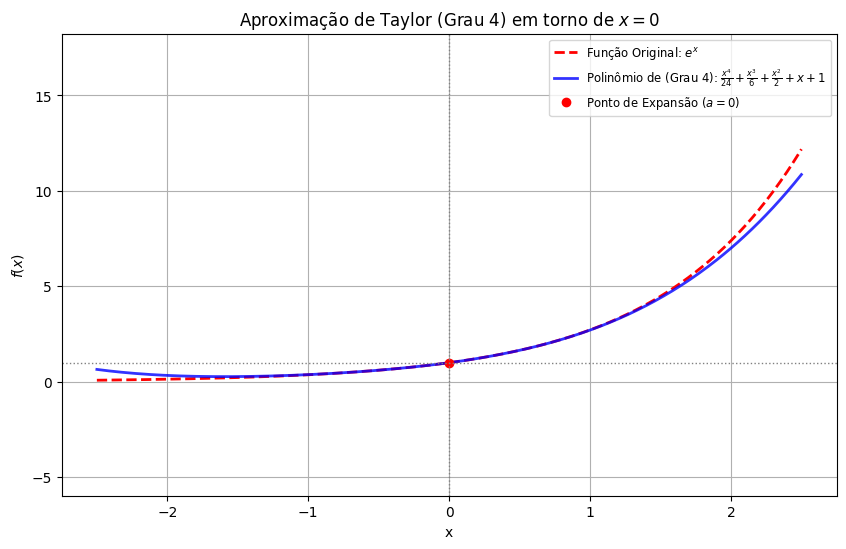

In [29]:
# Teste 3:
# # Polinômio de Taylor de grau 3 (times - 1) da função exp(x) no ponto 0.

funcao_exp = sp.exp(x)
p_exp = polinomio_de_taylor(funcao_exp, x, point=0, times=5, plot=True)